In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

print("Setup works ✅") 

Setup works ✅


In [3]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "NVDA", "SPY"]
prices = yf.download(tickers, start="2015-01-01", auto_adjust=True)["Close"]

print(prices.tail())
print("Rows:", len(prices), "Cols:", prices.shape[1])

[*********************100%***********************]  4 of 4 completed

Ticker            AAPL        MSFT        NVDA         SPY
Date                                                      
2026-01-23  248.039993  465.950012  187.669998  689.229980
2026-01-26  255.410004  470.279999  186.470001  692.729980
2026-01-27  258.269989  480.579987  188.520004  695.489990
2026-01-28  256.440002  481.630005  191.520004  695.419983
2026-01-29  258.279999  433.500000  192.509995  694.039978
Rows: 2785 Cols: 4


In [4]:
# Convert daily prices to month-end prices
month_end = prices.resample("ME").last()

# Monthly returns
monthly_ret = month_end.pct_change().dropna()

print(monthly_ret.shape)
monthly_ret.head()

(132, 4)


Ticker,AAPL,MSFT,NVDA,SPY
Date,,,,
2015-02-28,0.100777,0.093120,0.153382,0.056205
2015-03-31,-0.031372,-0.072748,-0.051224,-0.015706
2015-04-30,0.005787,0.196262,0.060679,0.009834
2015-05-31,0.045339,-0.030334,0.001461,0.012856
2015-06-30,-0.037227,-0.057832,-0.091279,-0.020312


In [5]:
top30 = [
    "NVDA","AAPL","MSFT","AMZN","GOOGL","GOOG","META","AVGO","TSLA","BRK.B",
    "WMT","LLY","JPM","V","XOM","JNJ","MU","MA","ORCL","COST",
    "AMD","ABBV","BAC","HD","PLTR","NFLX","PG","CVX","KO","GE"
]

top30_yf = [t.replace(".", "-") for t in top30]
tickers = top30_yf + ["SPY"]
tickers

['NVDA',
 'AAPL',
 'MSFT',
 'AMZN',
 'GOOGL',
 'GOOG',
 'META',
 'AVGO',
 'TSLA',
 'BRK-B',
 'WMT',
 'LLY',
 'JPM',
 'V',
 'XOM',
 'JNJ',
 'MU',
 'MA',
 'ORCL',
 'COST',
 'AMD',
 'ABBV',
 'BAC',
 'HD',
 'PLTR',
 'NFLX',
 'PG',
 'CVX',
 'KO',
 'GE',
 'SPY']

In [6]:
import yfinance as yf

prices = yf.download(tickers, start="2015-01-01", auto_adjust=True)["Close"]

print("Downloaded columns:", list(prices.columns))
missing = set(tickers) - set(prices.columns)
print("Missing:", missing)
prices.tail()

[*********************100%***********************]  31 of 31 completed

Downloaded columns: ['AAPL', 'ABBV', 'AMD', 'AMZN', 'AVGO', 'BAC', 'BRK-B', 'COST', 'CVX', 'GE', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'KO', 'LLY', 'MA', 'META', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PLTR', 'SPY', 'TSLA', 'V', 'WMT', 'XOM']
Missing: set()


Ticker,AAPL,ABBV,AMD,AMZN,AVGO,BAC,BRK-B,COST,CVX,GE,...,NFLX,NVDA,ORCL,PG,PLTR,SPY,TSLA,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2026-01-23,248.039993,219.259995,259.679993,239.160004,320.049988,51.720001,478.970001,983.250000,166.720001,293.869995,...,86.120003,187.669998,177.160004,150.149994,169.600006,689.229980,449.059998,326.179993,117.730003,134.970001
2026-01-26,255.410004,220.770004,251.309998,238.419998,324.850006,52.020000,483.470001,977.669983,167.500000,295.059998,...,85.699997,186.470001,182.440002,149.490005,167.470001,692.729980,435.200012,328.489990,117.639999,134.839996
2026-01-27,258.269989,223.929993,252.029999,244.679993,332.790009,52.169998,474.670013,970.280029,169.050003,297.470001,...,85.580002,188.520004,174.899994,148.339996,165.699997,695.489990,430.899994,325.260010,116.940002,136.830002
2026-01-28,256.440002,218.669998,252.740005,243.009995,333.239990,51.810001,473.489990,960.780029,169.929993,292.480011,...,84.639999,191.520004,172.800003,147.339996,157.350006,695.419983,431.459991,326.980011,116.570000,137.580002
2026-01-29,258.279999,220.429993,252.179993,241.729996,330.730011,53.080002,476.790009,952.890015,171.190002,298.859985,...,83.160004,192.509995,169.009995,149.899994,151.860001,694.039978,416.559998,331.799988,117.410004,140.509995


In [7]:
import pandas as pd

# Month-end prices and monthly returns
month_end = prices.resample("ME").last()
monthly_ret = month_end.pct_change().dropna()

print("monthly_ret shape:", monthly_ret.shape)
monthly_ret.tail()

monthly_ret shape: (64, 31)


Ticker,AAPL,ABBV,AMD,AMZN,AVGO,BAC,BRK-B,COST,CVX,GE,...,NFLX,NVDA,ORCL,PG,PLTR,SPY,TSLA,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-09-30,0.096881,0.100475,-0.005165,-0.041179,0.111252,0.022407,-0.000477,-0.018753,-0.033064,0.094432,...,-0.007722,0.071251,0.243709,-0.021587,0.164061,0.035620,0.332015,-0.029564,0.062693,-0.013474
2025-10-31,0.061815,-0.051516,0.583040,0.112265,0.120396,0.036053,-0.050125,-0.013926,0.015648,0.027026,...,-0.066777,0.085272,-0.064622,-0.014504,0.098948,0.023837,0.026623,-0.001875,-0.018242,0.014279
2025-11-30,0.032364,0.044304,-0.150672,-0.045041,0.090171,0.003742,0.075952,0.002348,-0.031081,-0.033986,...,-0.038486,-0.125883,-0.230989,-0.014697,-0.159725,0.001950,-0.057802,-0.016545,0.092212,0.022507
2025-12-31,-0.025067,0.003470,-0.015492,-0.010291,-0.139462,0.030491,-0.021720,-0.056097,0.008470,0.033279,...,-0.128463,0.053731,-0.034860,-0.032735,0.055209,0.000797,0.045447,0.048648,0.010199,0.038130
2026-01-31,-0.049952,-0.027513,0.177531,0.047266,-0.044409,-0.034909,-0.051447,0.105005,0.123220,-0.029770,...,-0.113055,0.032225,-0.130590,0.053411,-0.145654,0.017773,-0.073735,-0.053919,0.053855,0.167608


In [8]:
print("Daily start/end:", prices.index.min(), "→", prices.index.max())
print("Month-end start/end:", month_end.index.min(), "→", month_end.index.max())
print("Monthly returns start/end:", monthly_ret.index.min(), "→", monthly_ret.index.max())

Daily start/end: 2015-01-02 00:00:00 → 2026-01-29 00:00:00
Month-end start/end: 2015-01-31 00:00:00 → 2026-01-31 00:00:00
Monthly returns start/end: 2020-10-31 00:00:00 → 2026-01-31 00:00:00


In [9]:
# Count how many tickers have data each month (non-NaN)
coverage = month_end.notna().sum(axis=1)

# Show coverage around 2015–2026
coverage.tail(), coverage.head(), coverage.describe()

(Date
 2025-09-30    31
 2025-10-31    31
 2025-11-30    31
 2025-12-31    31
 2026-01-31    31
 Freq: ME, dtype: int64,
 Date
 2015-01-31    30
 2015-02-28    30
 2015-03-31    30
 2015-04-30    30
 2015-05-31    30
 Freq: ME, dtype: int64,
 count    133.000000
 mean      30.488722
 std        0.501763
 min       30.000000
 25%       30.000000
 50%       30.000000
 75%       31.000000
 max       31.000000
 dtype: float64)

In [10]:
full_coverage_start = coverage[coverage == month_end.shape[1]].index.min()
full_coverage_start

Timestamp('2020-09-30 00:00:00')

In [11]:
# Recompute monthly returns just to be safe
monthly_ret = month_end.pct_change()

# 12–1 momentum: cumulative return over the prior 12 months, shifted by 1 month (skip the most recent month)
mom_12_1 = (month_end / month_end.shift(12) - 1).shift(1)

# keep only dates where momentum is available for all assets (drop early NaNs)
mom_12_1_clean = mom_12_1.dropna()

print("Momentum start/end:", mom_12_1_clean.index.min(), "→", mom_12_1_clean.index.max())
mom_12_1_clean.head()

Momentum start/end: 2021-10-31 00:00:00 → 2026-01-31 00:00:00


Ticker,AAPL,ABBV,AMD,AMZN,AVGO,BAC,BRK-B,COST,CVX,GE,...,NFLX,NVDA,ORCL,PG,PLTR,SPY,TSLA,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-31,0.229688,0.292510,0.255031,0.043291,0.373472,0.798602,0.281770,0.309239,0.487508,1.073830,...,0.220607,0.532662,0.482795,0.030464,1.530526,0.299487,0.807604,0.120476,0.011680,0.837907
2021-11-30,0.384930,0.412106,0.596892,0.110759,0.569125,1.057748,0.421545,0.421241,0.739092,0.772331,...,0.451024,1.041946,0.736202,0.069194,1.554788,0.426224,1.870838,0.172290,0.093622,1.120050
2021-12-31,0.397052,0.155187,0.709152,0.107016,0.422691,0.611866,0.208728,0.423621,0.362537,0.170113,...,0.308131,1.440786,0.596295,0.067304,-0.238288,0.275969,1.016843,-0.073162,-0.065295,0.665870
2022-01-31,0.346482,0.324260,0.569076,0.023768,0.564849,0.496090,0.289516,0.518212,0.462413,0.096853,...,0.114123,1.254821,0.368894,0.205221,-0.226752,0.287288,0.497556,-0.003149,0.019708,0.575756
2022-02-28,0.332657,0.398018,0.334073,-0.066973,0.339129,0.586113,0.373678,0.444215,0.622224,0.109295,...,-0.197693,0.886671,0.363585,0.282133,-0.610290,0.231949,0.180447,0.177538,0.010985,0.798190


In [12]:
# Separate assets (exclude SPY from selection universe)
assets = [c for c in month_end.columns if c != "SPY"]

# Align returns to momentum dates
ret = monthly_ret.loc[mom_12_1_clean.index, assets]
spy_ret = monthly_ret.loc[mom_12_1_clean.index, "SPY"]

# For each month, pick top 10 by momentum
top_n = 10
ranks = mom_12_1_clean[assets].rank(axis=1, ascending=False)
w = (ranks <= top_n).astype(int)
w = w.div(w.sum(axis=1), axis=0)  # equal weight among selected

# Portfolio return = weights at time t applied to returns at time t+1
port_ret = (w.shift(1) * ret).sum(axis=1)

# Drop first month (no prior weights)
port_ret = port_ret.dropna()
spy_ret = spy_ret.loc[port_ret.index]

print("Port months:", len(port_ret))
port_ret.head()

Port months: 52


Date
2021-10-31    0.000000
2021-11-30   -0.028834
2021-12-31   -0.012456
2022-01-31   -0.058951
2022-02-28   -0.001009
Freq: ME, dtype: float64

In [13]:
# Turnover approximation: sum of absolute changes in weights month-to-month / 2
w_aligned = w.loc[port_ret.index]          # align weights with returns index
turnover = w_aligned.diff().abs().sum(axis=1) / 2
turnover = turnover.fillna(0)

cost_bps = 10  # 10 basis points = 0.10%
cost = turnover * (cost_bps / 10000)

port_ret_net = port_ret - cost

print("Avg monthly turnover:", turnover.mean())
print("Avg monthly cost:", cost.mean())
port_ret_net.head()

Avg monthly turnover: 0.1692307692307692
Avg monthly cost: 0.0001692307692307692


Date
2021-10-31    0.000000
2021-11-30   -0.028834
2021-12-31   -0.012756
2022-01-31   -0.059251
2022-02-28   -0.001409
Freq: ME, dtype: float64

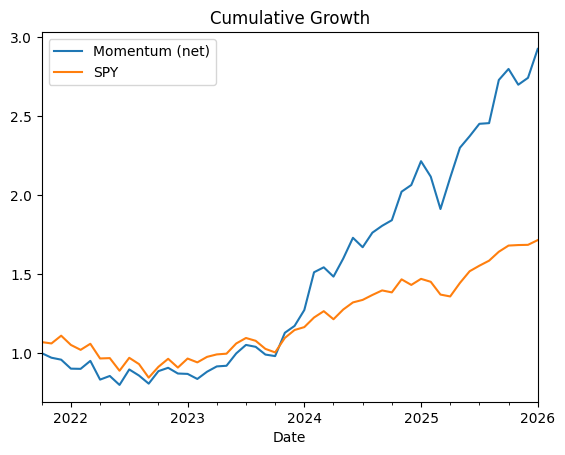

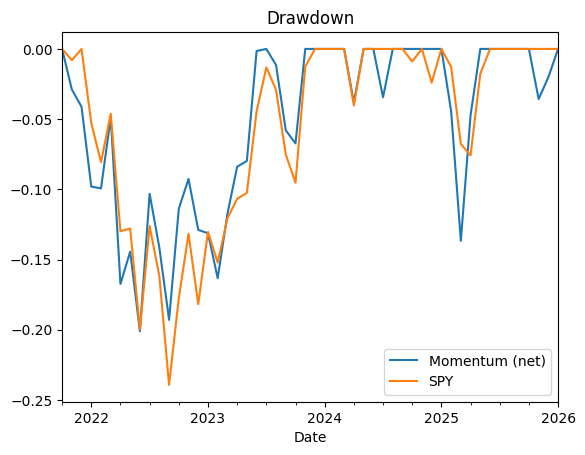

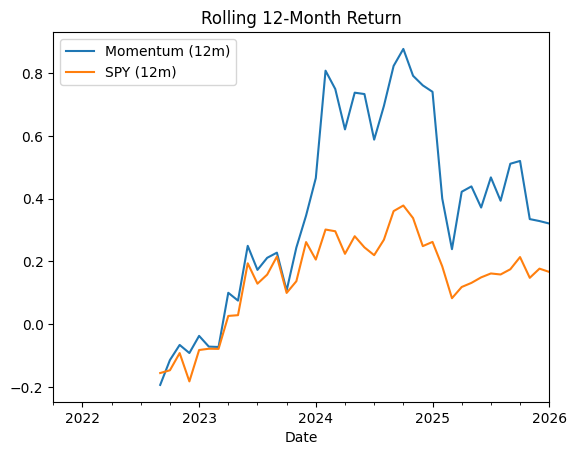

In [14]:
import matplotlib.pyplot as plt

def cum_growth(r):
    return (1 + r).cumprod()

def drawdown(r):
    cg = cum_growth(r)
    peak = cg.cummax()
    return cg/peak - 1

strategy_cg = cum_growth(port_ret_net)
spy_cg = cum_growth(spy_ret.loc[port_ret_net.index])

plt.figure()
strategy_cg.plot(label="Momentum (net)")
spy_cg.plot(label="SPY")
plt.title("Cumulative Growth")
plt.legend()
plt.show()

plt.figure()
drawdown(port_ret_net).plot(label="Momentum (net)")
drawdown(spy_ret.loc[port_ret_net.index]).plot(label="SPY")
plt.title("Drawdown")
plt.legend()
plt.show()

plt.figure()
port_ret_net.rolling(12).apply(lambda x: (1+x).prod()-1, raw=False).plot(label="Momentum (12m)")
spy_ret.loc[port_ret_net.index].rolling(12).apply(lambda x: (1+x).prod()-1, raw=False).plot(label="SPY (12m)")
plt.title("Rolling 12-Month Return")
plt.legend()
plt.show()

In [15]:
import numpy as np

def cagr(r):
    cg = (1+r).cumprod()
    years = len(r)/12
    return cg.iloc[-1]**(1/years) - 1

def ann_vol(r):
    return r.std() * np.sqrt(12)

def sharpe(r, rf=0.0):
    # rf is monthly risk-free; keep 0 for now
    excess = r - rf
    return (excess.mean() * 12) / (r.std() * np.sqrt(12))

def max_dd(r):
    dd = drawdown(r)
    return dd.min()

metrics = pd.DataFrame({
    "CAGR": [cagr(port_ret_net), cagr(spy_ret.loc[port_ret_net.index])],
    "Ann.Vol": [ann_vol(port_ret_net), ann_vol(spy_ret.loc[port_ret_net.index])],
    "Sharpe (rf=0)": [sharpe(port_ret_net), sharpe(spy_ret.loc[port_ret_net.index])],
    "Max Drawdown": [max_dd(port_ret_net), max_dd(spy_ret.loc[port_ret_net.index])]
}, index=["Momentum (net)", "SPY"])

metrics

,CAGR,Ann.Vol,Sharpe (rf=0),Max Drawdown
Momentum (net),0.281168,0.219699,1.244607,-0.201043
SPY,0.132674,0.157255,0.873715,-0.239272


In [16]:
def momentum_signal(month_end_prices, lookback=12, skip=1):
    # return from t-lookback to t-skip, measured at month-end
    return (month_end_prices / month_end_prices.shift(lookback) - 1).shift(skip)

def backtest_mom(lookback):
    mom = momentum_signal(month_end[assets], lookback=lookback, skip=1).dropna()
    ret_local = monthly_ret.loc[mom.index, assets]
    ranks = mom.rank(axis=1, ascending=False)
    w_local = (ranks <= top_n).astype(int)
    w_local = w_local.div(w_local.sum(axis=1), axis=0)
    pr = (w_local.shift(1) * ret_local).sum(axis=1).dropna()
    return pr

tests = {}
for lb in [3, 6, 12]:
    r = backtest_mom(lb)
    tests[f"{lb}-1 mom"] = cagr(r)

pd.Series(tests).sort_values(ascending=False)

3-1 mom     0.354841
6-1 mom     0.336468
12-1 mom    0.283728
dtype: float64

In [17]:
results = pd.DataFrame({
    "Momentum_net": port_ret_net,
    "SPY": spy_ret.loc[port_ret_net.index],
    "Turnover": turnover.loc[port_ret_net.index],
})

results.head()

,Momentum_net,SPY,Turnover
Date,,,
2021-10-31,0.000000,0.070163,0.0
2021-11-30,-0.028834,-0.008035,0.0
2021-12-31,-0.012756,0.046248,0.3
2022-01-31,-0.059251,-0.052741,0.3
2022-02-28,-0.001409,-0.029517,0.4


In [18]:
import os

os.makedirs("figures", exist_ok=True)
os.makedirs("reports", exist_ok=True)
os.makedirs("data", exist_ok=True)

results.to_csv("data/results_monthly.csv")
w_aligned.to_csv("data/weights_monthly.csv")

print("Saved:", os.listdir("data"))

Saved: ['results_monthly.csv', 'weights_monthly.csv']


In [19]:
import os
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 160

def save_all_charts(style_name: str, out_dir: str, dark: bool):
    os.makedirs(out_dir, exist_ok=True)

    # Apply style inside a context so it doesn't permanently change your notebook
    with plt.style.context(style_name):
        # “Codey” touches: monospace + subtle grid
        plt.rcParams["font.family"] = "monospace"
        plt.rcParams["axes.grid"] = True
        plt.rcParams["grid.alpha"] = 0.25
        plt.rcParams["grid.linestyle"] = "--"

        # 1) Cumulative growth
        fig = plt.figure()
        strategy_cg.plot(label="Momentum (net)")
        spy_cg.plot(label="SPY")
        plt.title("Cumulative Growth (Base=1)")
        plt.xlabel("")
        plt.ylabel("Growth of $1")
        plt.legend()
        plt.tight_layout()
        fig.savefig(
            os.path.join(out_dir, "cumulative_growth.png"),
            facecolor=("black" if dark else "white"),
            edgecolor="none"
        )
        plt.close(fig)

        # 2) Drawdown
        fig = plt.figure()
        drawdown(port_ret_net).plot(label="Momentum (net)")
        drawdown(spy_ret.loc[port_ret_net.index]).plot(label="SPY")
        plt.title("Drawdown")
        plt.xlabel("")
        plt.ylabel("Drawdown")
        plt.legend()
        plt.tight_layout()
        fig.savefig(
            os.path.join(out_dir, "drawdown.png"),
            facecolor=("black" if dark else "white"),
            edgecolor="none"
        )
        plt.close(fig)

        # 3) Rolling 12M return
        fig = plt.figure()
        port_ret_net.rolling(12).apply(lambda x: (1+x).prod()-1, raw=False).plot(label="Momentum (12m)")
        spy_ret.loc[port_ret_net.index].rolling(12).apply(lambda x: (1+x).prod()-1, raw=False).plot(label="SPY (12m)")
        plt.title("Rolling 12-Month Return")
        plt.xlabel("")
        plt.ylabel("Return")
        plt.legend()
        plt.tight_layout()
        fig.savefig(
            os.path.join(out_dir, "rolling_12m_return.png"),
            facecolor=("black" if dark else "white"),
            edgecolor="none"
        )
        plt.close(fig)

# Save BOTH sets
save_all_charts("default", "figures/light", dark=False)
save_all_charts("dark_background", "figures/dark", dark=True)

print("Light:", os.listdir("figures/light"))
print("Dark :", os.listdir("figures/dark"))

Light: ['cumulative_growth.png', 'drawdown.png', 'rolling_12m_return.png']
Dark : ['cumulative_growth.png', 'drawdown.png', 'rolling_12m_return.png']


In [20]:
# === Values for Memo ===
mom_cagr = cagr(port_ret_net)
spy_cagr = cagr(spy_ret.loc[port_ret_net.index])

mom_mdd = max_dd(port_ret_net)
spy_mdd = max_dd(spy_ret.loc[port_ret_net.index])

mom_vol = ann_vol(port_ret_net)
spy_vol = ann_vol(spy_ret.loc[port_ret_net.index])

mom_sh = sharpe(port_ret_net)
spy_sh = sharpe(spy_ret.loc[port_ret_net.index])

avg_to = turnover.mean()

rob = pd.Series({
    "3–1": backtest_mom(3),
    "6–1": backtest_mom(6),
    "12–1": backtest_mom(12),
}).apply(cagr)

print(f"- Momentum CAGR: {mom_cagr:.2%}")
print(f"- SPY CAGR: {spy_cagr:.2%}")
print(f"- Max drawdown (Momentum vs SPY): {mom_mdd:.2%} vs {spy_mdd:.2%}")
print(f"- Annualized volatility (Momentum vs SPY): {mom_vol:.2%} vs {spy_vol:.2%}")
print(f"- Sharpe (rf=0): {mom_sh:.2f} vs {spy_sh:.2f}")
print(f"- Avg monthly turnover: {avg_to:.3f} (~{avg_to*100:.1f}%)")
print("\nRobustness (CAGR):")
for k,v in rob.items():
    print(f"- {k} momentum CAGR: {v:.2%}")

- Momentum CAGR: 28.12%
- SPY CAGR: 13.27%
- Max drawdown (Momentum vs SPY): -20.10% vs -23.93%
- Annualized volatility (Momentum vs SPY): 21.97% vs 15.73%
- Sharpe (rf=0): 1.24 vs 0.87
- Avg monthly turnover: 0.169 (~16.9%)

Robustness (CAGR):
- 3–1 momentum CAGR: 35.48%
- 6–1 momentum CAGR: 33.65%
- 12–1 momentum CAGR: 28.37%


In [21]:
# Equal-weight Top 30 benchmark (monthly)
# Same dates as your strategy net returns
idx = port_ret_net.index

ew_ret = monthly_ret.loc[idx, assets].mean(axis=1)  # 1/30 each month
spy_ret_aligned = spy_ret.loc[idx]

# Metrics table: Momentum vs EW30 vs SPY
bench = pd.DataFrame({
    "Momentum_net": port_ret_net,
    "EW_Top30": ew_ret,
    "SPY": spy_ret_aligned
})

metrics2 = pd.DataFrame({
    "CAGR": bench.apply(cagr),
    "Ann.Vol": bench.apply(ann_vol),
    "Sharpe (rf=0)": bench.apply(sharpe),
    "Max Drawdown": bench.apply(max_dd)
})

metrics2

,CAGR,Ann.Vol,Sharpe (rf=0),Max Drawdown
Momentum_net,0.281168,0.219699,1.244607,-0.201043
EW_Top30,0.276501,0.181762,1.445971,-0.247241
SPY,0.132674,0.157255,0.873715,-0.239272


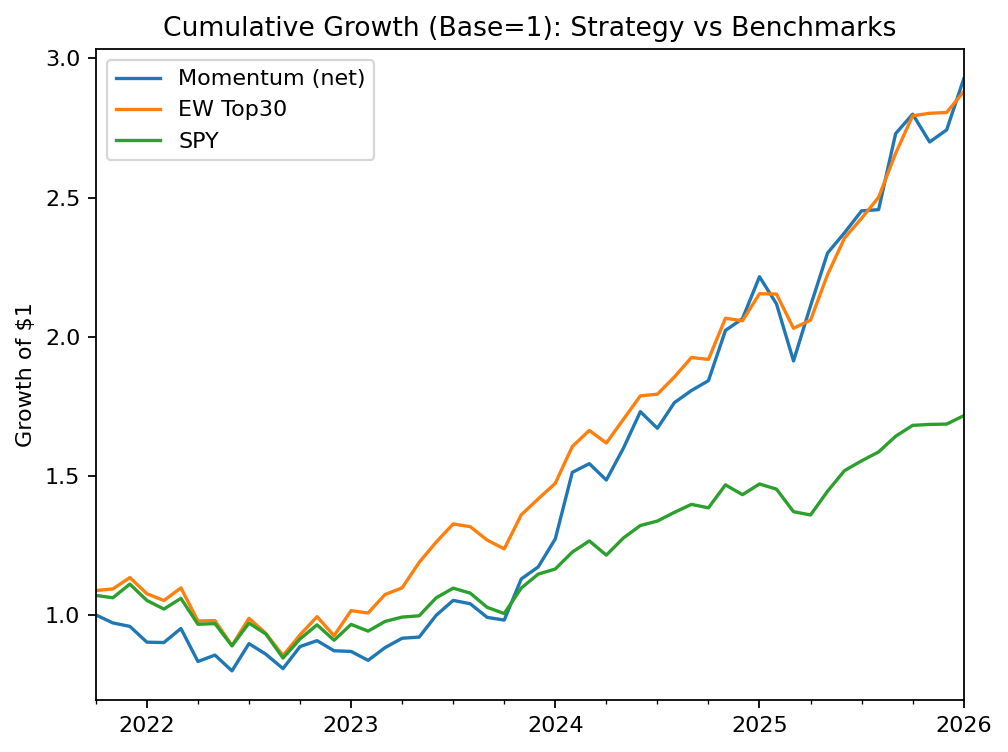

In [22]:
ew_cg = cum_growth(ew_ret)

plt.figure()
strategy_cg.plot(label="Momentum (net)")
ew_cg.plot(label="EW Top30")
spy_cg.plot(label="SPY")
plt.title("Cumulative Growth (Base=1): Strategy vs Benchmarks")
plt.xlabel("")
plt.ylabel("Growth of $1")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import statsmodels.api as sm

# --- 1) Download + parse FF5 monthly factors from Ken French (ZIP) ---
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_CSV.zip"
ff_raw = pd.read_csv(ff_url, compression="zip", skiprows=3)

# first column is the date, often named "Unnamed: 0"
ff_raw = ff_raw.rename(columns={ff_raw.columns[0]: "date"})

# Keep only monthly rows where date looks like YYYYMM
ff_raw = ff_raw[ff_raw["date"].astype(str).str.fullmatch(r"\d{6}")].copy()

# Convert YYYYMM -> month-end timestamp
ff_raw["date"] = pd.to_datetime(ff_raw["date"], format="%Y%m") + pd.offsets.MonthEnd(0)
ff_raw = ff_raw.set_index("date")

# Convert percent to decimals
ff = ff_raw.astype(float) / 100.0

# --- 2) Align sample (FF data may lag by a month vs your price data) ---
idx = port_ret_net.index.intersection(ff.index)
ff = ff.loc[idx]

# --- 3) FF5 regression with Newey–West (HAC) standard errors ---
y = port_ret_net.loc[idx] - ff["RF"]  # excess return
X = ff[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags": 3})

alpha = model.params["const"]
t_alpha = model.tvalues["const"]
p_alpha = model.pvalues["const"]

print("Sample months used:", len(idx), "| last month:", idx.max())
print("Monthly alpha:", f"{alpha:.4%}")
print("t(alpha):", round(t_alpha, 2), "| p(alpha):", round(p_alpha, 4))
print("\nBetas:")
print(model.params.drop("const").round(3))

Sample months used: 51 | last month: 2025-12-31 00:00:00
Monthly alpha: 1.0359%
t(alpha): 2.62 | p(alpha): 0.0088

Betas:
Mkt-RF    1.089
SMB      -0.541
HML      -0.101
RMW      -0.549
CMA      -0.010
dtype: float64


In [25]:
import numpy as np
import pandas as pd

target_vol = 0.20  # 20% annualized
lookback = 12      # 12 months rolling vol
max_leverage = 1.5 # cap scaling to avoid extreme leverage

# Realized annualized vol from monthly returns
realized_vol = port_ret_net.rolling(lookback).std() * np.sqrt(12)

# Scaling factor (shift so we only use information available at the time)
scale = (target_vol / realized_vol).shift(1)

# Cap leverage and handle early NaNs
scale = scale.clip(lower=0.0, upper=max_leverage).fillna(1.0)

# Vol-targeted returns
port_ret_vt = port_ret_net * scale

# Compare metrics
bench_vt = pd.DataFrame({
    "Momentum_net": port_ret_net,
    "Momentum_volTarget": port_ret_vt,
    "SPY": spy_ret.loc[port_ret_net.index]
})

metrics_vt = pd.DataFrame({
    "CAGR": bench_vt.apply(cagr),
    "Ann.Vol": bench_vt.apply(ann_vol),
    "Sharpe (rf=0)": bench_vt.apply(sharpe),
    "Max Drawdown": bench_vt.apply(max_dd),
})

metrics_vt

,CAGR,Ann.Vol,Sharpe (rf=0),Max Drawdown
Momentum_net,0.281168,0.219699,1.244607,-0.201043
Momentum_volTarget,0.256643,0.223749,1.136981,-0.201043
SPY,0.132674,0.157255,0.873715,-0.239272


In [26]:
target_vol = 0.20
lookback = 12

realized_vol = port_ret_net.rolling(lookback, min_periods=lookback).std() * np.sqrt(12)
scale = (target_vol / realized_vol).shift(1)

# only de-risk (no leverage)
scale = scale.clip(lower=0.0, upper=1.0)

port_ret_vt = (port_ret_net * scale).dropna()

bench_vt = pd.DataFrame({
    "Momentum_net": port_ret_net.loc[port_ret_vt.index],
    "Momentum_volTarget": port_ret_vt,
    "SPY": spy_ret.loc[port_ret_vt.index]
})

metrics_vt = pd.DataFrame({
    "CAGR": bench_vt.apply(cagr),
    "Ann.Vol": bench_vt.apply(ann_vol),
    "Sharpe (rf=0)": bench_vt.apply(sharpe),
    "Max Drawdown": bench_vt.apply(max_dd),
})

metrics_vt

,CAGR,Ann.Vol,Sharpe (rf=0),Max Drawdown
Momentum_net,0.471693,0.204661,2.014799,-0.136674
Momentum_volTarget,0.425598,0.194228,1.943761,-0.134155
SPY,0.236782,0.127466,1.743547,-0.083258


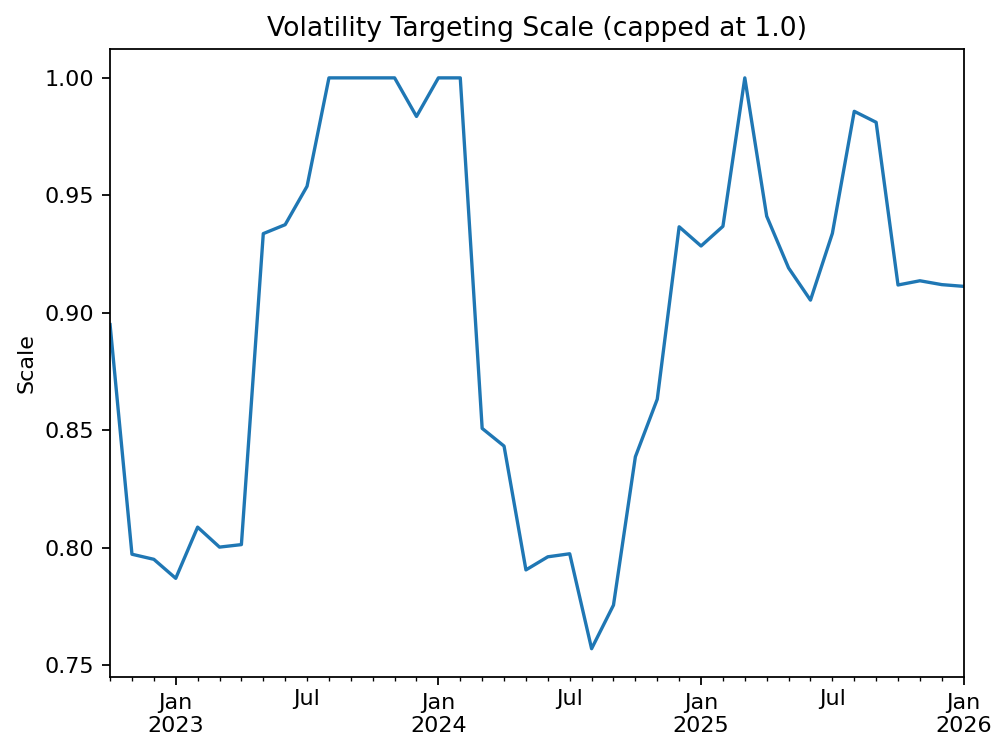

In [27]:
plt.figure()
scale.loc[bench_vt.index].plot()
plt.title("Volatility Targeting Scale (capped at 1.0)")
plt.xlabel("")
plt.ylabel("Scale")
plt.tight_layout()
plt.show()

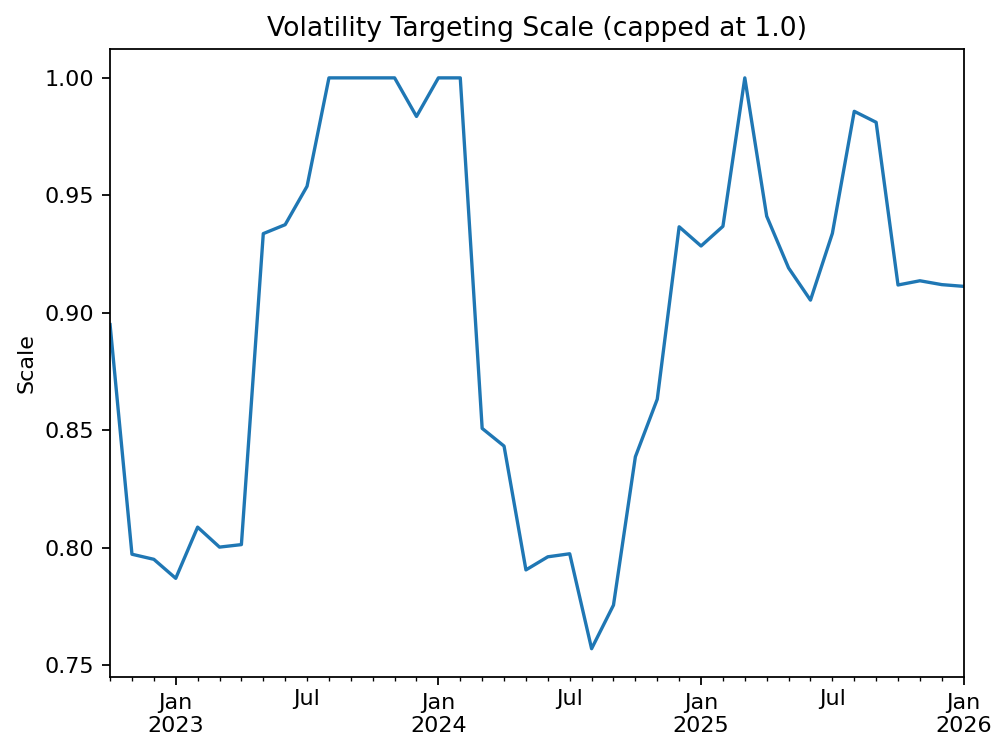

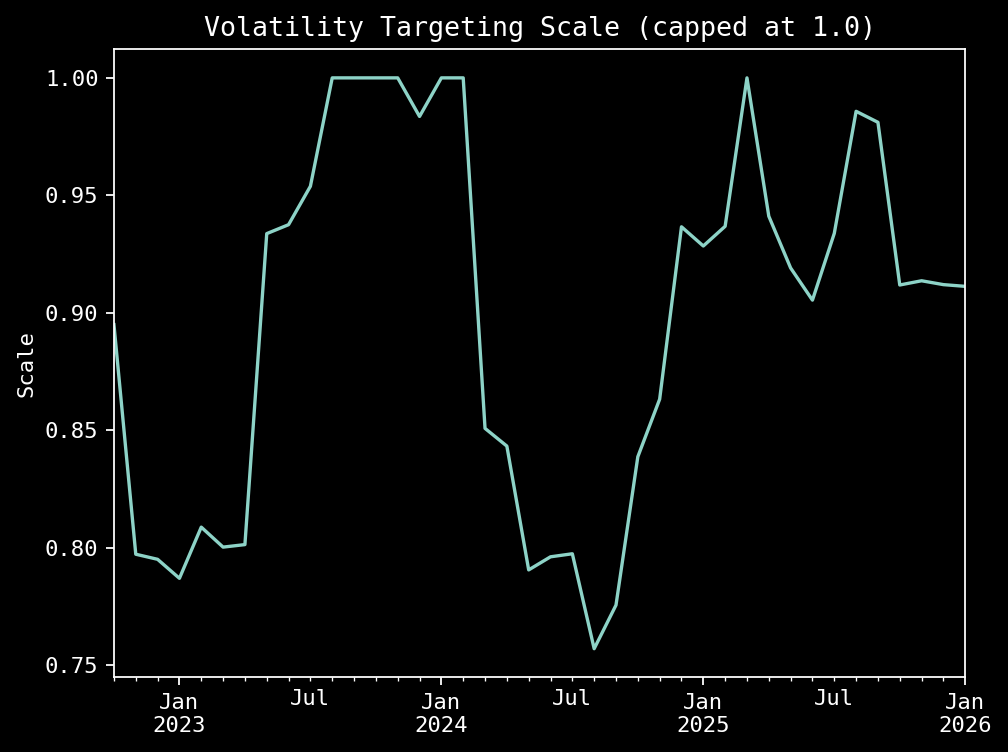

In [28]:
import os
import matplotlib.pyplot as plt

os.makedirs("figures/light", exist_ok=True)
os.makedirs("figures/dark", exist_ok=True)

# Light version
plt.figure()
scale.loc[bench_vt.index].plot()
plt.title("Volatility Targeting Scale (capped at 1.0)")
plt.xlabel("")
plt.ylabel("Scale")
plt.tight_layout()
plt.savefig("figures/light/vol_target_scale.png")
plt.show()

# Dark version
with plt.style.context("dark_background"):
    plt.rcParams["font.family"] = "monospace"
    plt.figure()
    scale.loc[bench_vt.index].plot()
    plt.title("Volatility Targeting Scale (capped at 1.0)")
    plt.xlabel("")
    plt.ylabel("Scale")
    plt.tight_layout()
    plt.savefig("figures/dark/vol_target_scale.png", facecolor="black", edgecolor="none")
    plt.show()

In [29]:
from pathlib import Path
import os

# set working directory to the project root (parent of /notebooks)
project_root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
os.chdir(project_root)

print("Working directory set to:", Path.cwd())

Working directory set to: c:\Users\cobyb\Desktop\momentum_backtest


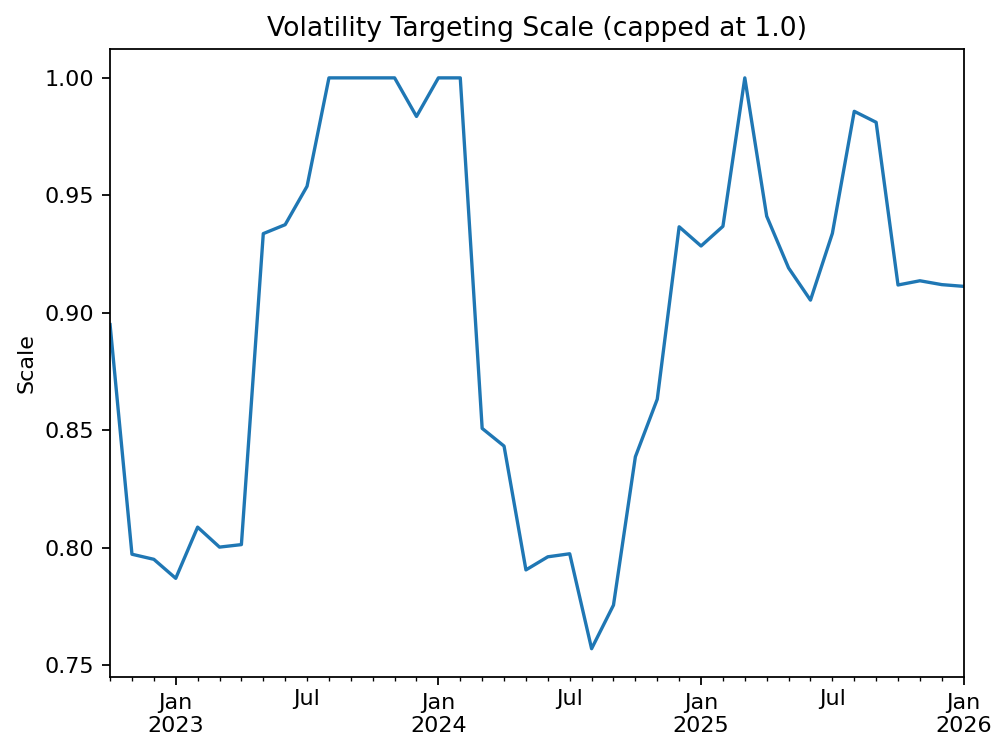

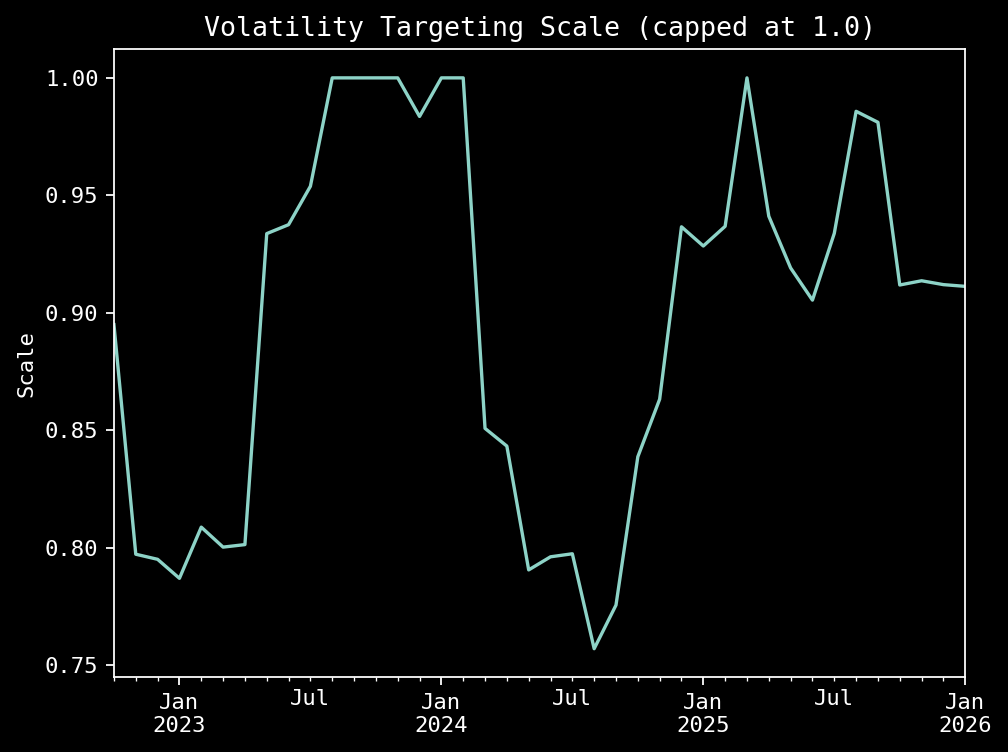

In [30]:
import os
import matplotlib.pyplot as plt

os.makedirs("figures/light", exist_ok=True)
os.makedirs("figures/dark", exist_ok=True)

# Light version
plt.figure()
scale.loc[bench_vt.index].plot()
plt.title("Volatility Targeting Scale (capped at 1.0)")
plt.xlabel("")
plt.ylabel("Scale")
plt.tight_layout()
plt.savefig("figures/light/vol_target_scale.png")
plt.show()

# Dark version
with plt.style.context("dark_background"):
    plt.rcParams["font.family"] = "monospace"
    plt.figure()
    scale.loc[bench_vt.index].plot()
    plt.title("Volatility Targeting Scale (capped at 1.0)")
    plt.xlabel("")
    plt.ylabel("Scale")
    plt.tight_layout()
    plt.savefig("figures/dark/vol_target_scale.png", facecolor="black", edgecolor="none")
    plt.show()